In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [85]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [9]:

data = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [2.4, 4.5, 6.1, 8.0, 10.2, 12.5, 15.1, 18.0, 21.2, 24.5]
}
df = pd.DataFrame(data)
df

,X,Y
0,1,2.4
1,2,4.5
2,3,6.1
3,4,8.0
4,5,10.2
5,6,12.5
6,7,15.1
7,8,18.0
8,9,21.2
9,10,24.5


In [13]:
# Feature column
x = df[['X']]
# Target Column
y = df[['Y']]

In [11]:
# Splitting dataset into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Linear Regression
Mean Squared Error: 0.5827697447962619
R-squared: 0.9874697125921774



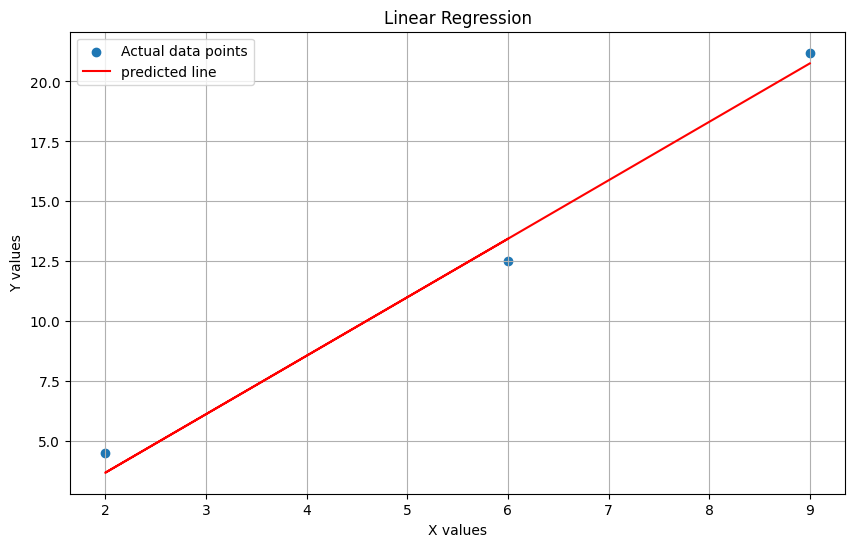

In [21]:
# Applying linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

# y_prediction
y_pred = model.predict(X_test)

# calculating metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#printing metrics
print("Linear Regression")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print()

#plotting linear regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X_test,Y_test,label = 'Actual data points')
plt.plot(X_test,y_pred, color = 'Red',label = 'predicted line')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression")
plt.grid(True)
plt.legend()

Polynomial Regression (Degree 2):
Mean Squared Error: 0.05335475557310007
R-squared: 0.9988528051981511

Polynomial Regression (Degree 3):
Mean Squared Error: 0.04036896059566177
R-squared: 0.9991320162325936

Polynomial Regression (Degree 4):
Mean Squared Error: 0.02541537019200346
R-squared: 0.9994535373602943



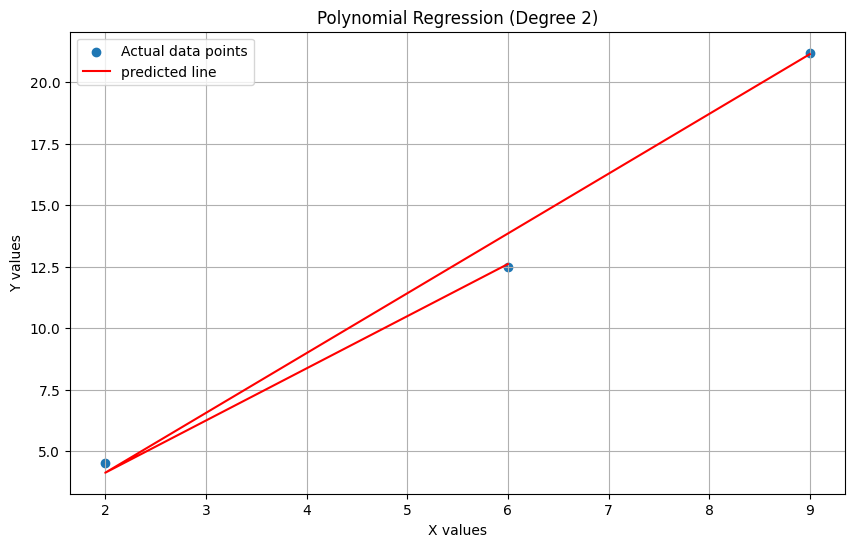

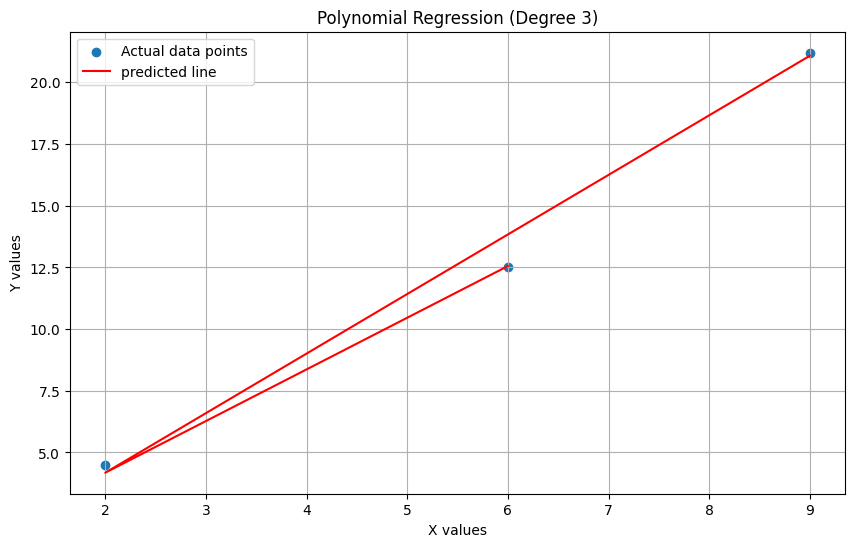

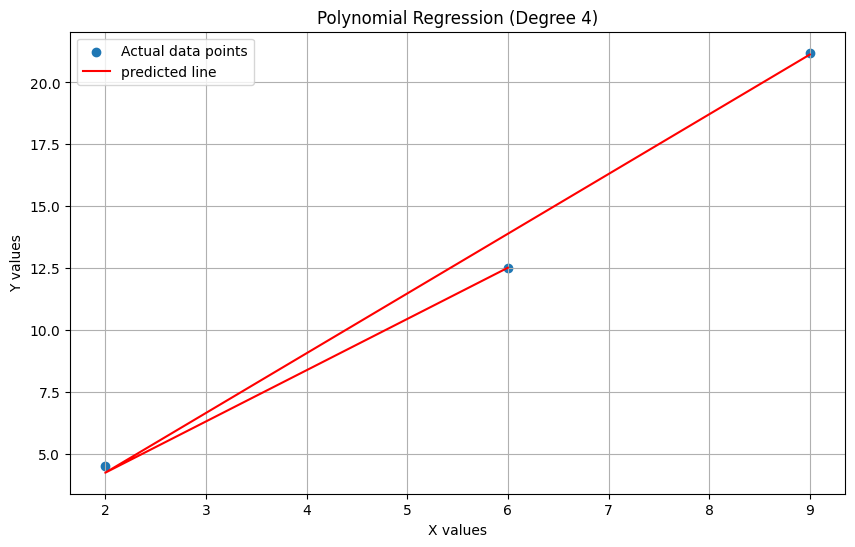

In [38]:
degree = [2,3,4]
for deg in degree:
    # Transforming features to polynomial features
    print(f"Polynomial Regression (Degree {deg}):")
    poly_features = PolynomialFeatures(degree=deg)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    #model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # y_prediction
    Y_pred = poly_model.predict(X_test_poly)

    #calculating metrics
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    #printing metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

    #plotting polynomial Regression fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test,Y_test,label = 'Actual data points')
    plt.plot(X_test,Y_pred, color = 'Red',label = 'predicted line')
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title(f"Polynomial Regression (Degree {deg})")
    plt.grid(True)
    plt.legend()

In [61]:
#E22CSEU0516
#Acchyutam Agrawal
#Q2

dataset = pd.read_csv('breast-cancer.csv')
diagnosis_map = {'M': 1, 'B': 0}
dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis_map)
dataset = dataset.drop('id', axis=1)
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [63]:
# Feature Column
X = dataset.drop(['diagnosis'],axis=1)

# Target column
Y = dataset[['diagnosis']]

In [64]:
# Splitting dataset for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Logistic Regression
Accuracy: 98.25%
Precision: 0.96875
Recall: 0.9841269841269841
F1 Score: 0.9763779527559054
ROC AUC Score: 0.9828042328042329
Confusion Matrix:
[[106   2]
 [  1  62]]



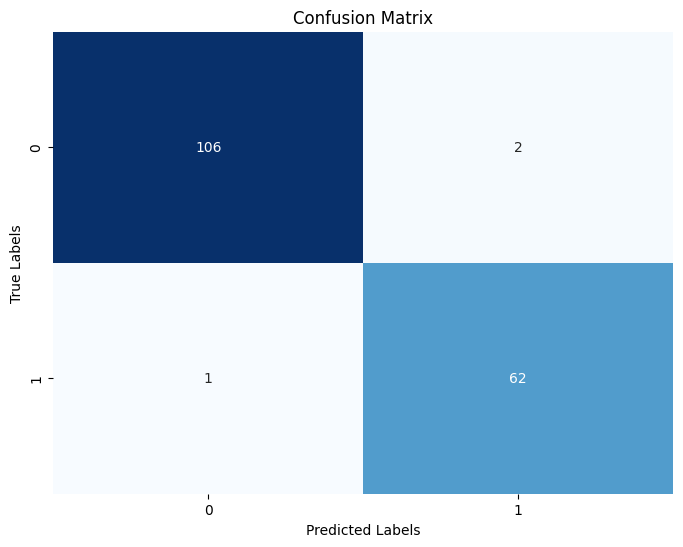

In [90]:
#Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Applying Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# Y_prediction
y_pred = model.predict(X_test)

# Calculating binary classification metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

#printing metrics
print("Logistic Regression")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)
print()

#plotting confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Polynomial Regression (Degree 2):
Logistic Regression
Accuracy: 95.91%
Precision: 0.9516129032258065
Recall: 0.9365079365079365
F1 Score: 0.944
ROC AUC Score: 0.9543650793650793
Confusion Matrix:
[[105   3]
 [  4  59]]



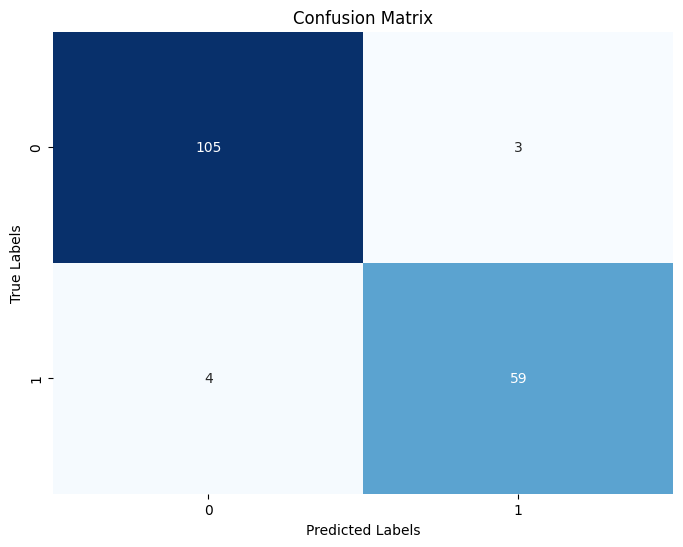

Polynomial Regression (Degree 3):
Logistic Regression
Accuracy: 97.08%
Precision: 0.967741935483871
Recall: 0.9523809523809523
F1 Score: 0.96
ROC AUC Score: 0.966931216931217
Confusion Matrix:
[[106   2]
 [  3  60]]



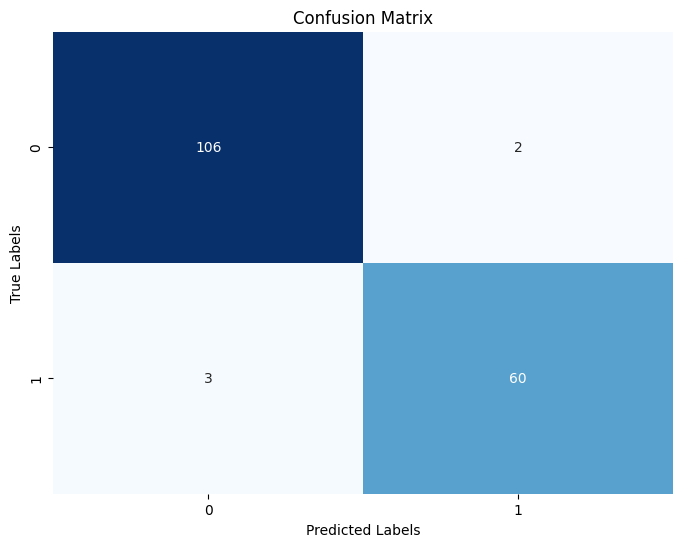

Polynomial Regression (Degree 4):
Logistic Regression
Accuracy: 93.57%
Precision: 0.9333333333333333
Recall: 0.8888888888888888
F1 Score: 0.9105691056910569
ROC AUC Score: 0.925925925925926
Confusion Matrix:
[[104   4]
 [  7  56]]



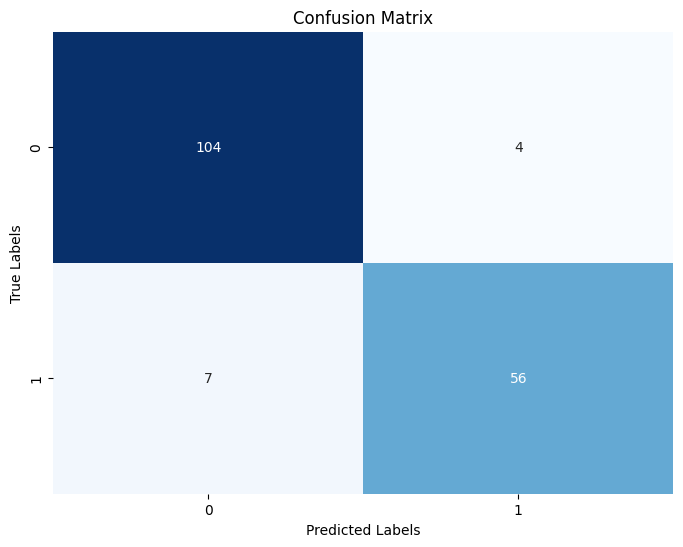

In [93]:
degree = [2, 3, 4]
for deg in degree:
    print(f"Polynomial Regression (Degree {deg}):")

    # Transforming features to polynomial features
    poly_features = PolynomialFeatures(degree=deg)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Scaling the features
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    # Fit logistic regression model
    poly_model = LogisticRegression(max_iter = 1000)
    poly_model.fit(X_train_poly, Y_train)

    # y_prediction
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating binary metrics
    accuracy = accuracy_score(Y_test, y_pred_poly)
    precision = precision_score(Y_test, y_pred_poly)
    recall = recall_score(Y_test, y_pred_poly)
    f1 = f1_score(Y_test, y_pred_poly)
    roc_auc = roc_auc_score(Y_test, y_pred_poly)
    conf_matrix = confusion_matrix(Y_test, y_pred_poly)

    #printing values
    print("Logistic Regression")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    #plotting confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()